## Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading the Data

In [28]:
data = pd.read_csv('../data/Cleaned_data.csv', index_col=0)

In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

## Modelling
Each Modelling technique will be done on three samples:
- Original Data
- Resampling using SMOTE
- Resampling using ADASYN

#### Creating the Samples

In [173]:
X = data.drop('Class',axis=1)
y = data['Class']

##### 1) Original Data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=46)

##### 2) Resampling using SMOTE

In [178]:
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

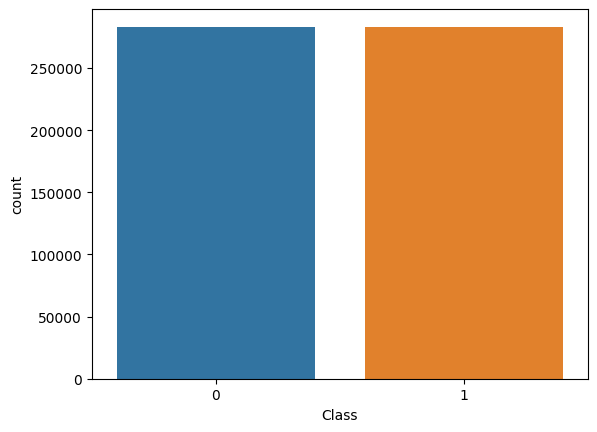

In [180]:
sns.countplot(data=pd.DataFrame(y_resampled_smote), x='Class');

In [182]:
pd.DataFrame(y_resampled_smote).value_counts()

Class
0        283253
1        283253
Name: count, dtype: int64

In [184]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled_smote, y_resampled_smote,
                                                    test_size=0.30, 
                                                    random_state=46)

##### 3) Resampling using ADASYN

In [192]:
X_resampled_ASA, y_resampled_ASA = ADASYN().fit_resample(X, y)

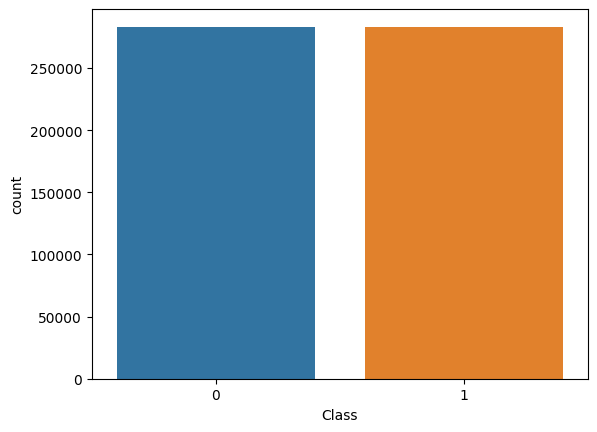

In [194]:
sns.countplot(data=pd.DataFrame(y_resampled_ASA), x='Class');

In [196]:
pd.DataFrame(y_resampled_ASA).value_counts()

Class
1        283299
0        283253
Name: count, dtype: int64

In [198]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled_ASA, y_resampled_ASA,
                                                    test_size=0.30, 
                                                    random_state=46)

### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression Without Resampling

In [202]:
logmod1 = LogisticRegression(max_iter=10000)
logmod1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [204]:
predictions_lgtest1 = logmod1.predict(X_test)
predictions_lgtrain1 = logmod1.predict(X_train)

In [206]:
print('Train')
print(confusion_matrix(y_train, predictions_lgtrain1))
print('\n')
print(classification_report(y_train, predictions_lgtrain1))
print('\n')
print('Test')
print(confusion_matrix(y_test, predictions_lgtest1))
print('\n')
print(classification_report(y_test, predictions_lgtest1))

Train
[[198233     38]
 [   131    206]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198271
           1       0.84      0.61      0.71       337

    accuracy                           1.00    198608
   macro avg       0.92      0.81      0.85    198608
weighted avg       1.00      1.00      1.00    198608



Test
[[84966    16]
 [   62    74]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84982
           1       0.82      0.54      0.65       136

    accuracy                           1.00     85118
   macro avg       0.91      0.77      0.83     85118
weighted avg       1.00      1.00      1.00     85118



#### Logistic Regression with SMOTE Resampling

In [208]:
logmod2 = LogisticRegression(max_iter=10000)
logmod2.fit(X_train2, y_train2)

LogisticRegression(max_iter=10000)

In [209]:
predictions_lgtest2 = logmod2.predict(X_test2)
predictions_lgtrain2 = logmod2.predict(X_train2)

In [210]:
print('Logistic Regression using SMOTE Resampling')
print('Train')
print(confusion_matrix(y_train2, predictions_lgtrain2))
print('\n')
print(classification_report(y_train2, predictions_lgtrain2))
print('\n')
print('Test')
print(confusion_matrix(y_test2, predictions_lgtest2))
print('\n')
print(classification_report(y_test2, predictions_lgtest2))

Logistic Regression using SMOTE Resampling
Train
[[194646   3466]
 [  7557 190885]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    198112
           1       0.98      0.96      0.97    198442

    accuracy                           0.97    396554
   macro avg       0.97      0.97      0.97    396554
weighted avg       0.97      0.97      0.97    396554



Test
[[83683  1458]
 [ 3306 81505]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85141
           1       0.98      0.96      0.97     84811

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952



#### Logistics Regression with ADASYN Resampling

In [214]:
logmod3 = LogisticRegression(max_iter=10000)
logmod3.fit(X_train3, y_train3)

LogisticRegression(max_iter=10000)

In [215]:
predictions_lgtest3 = logmod2.predict(X_test3)
predictions_lgtrain3 = logmod2.predict(X_train3)

In [218]:
print('Logistic Regression using ADASYN Resampling')
print('Train')
print(confusion_matrix(y_train3, predictions_lgtrain3))
print('\n')
print(classification_report(y_train3, predictions_lgtrain3))
print('\n')
print('Test')
print(confusion_matrix(y_test3, predictions_lgtest3))
print('\n')
print(classification_report(y_test3, predictions_lgtest3))

Logistic Regression using ADASYN Resampling
Train
[[194498   3452]
 [  7851 190785]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    197950
           1       0.98      0.96      0.97    198636

    accuracy                           0.97    396586
   macro avg       0.97      0.97      0.97    396586
weighted avg       0.97      0.97      0.97    396586



Test
[[83831  1472]
 [ 3487 81176]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85303
           1       0.98      0.96      0.97     84663

    accuracy                           0.97    169966
   macro avg       0.97      0.97      0.97    169966
weighted avg       0.97      0.97      0.97    169966



## Trees

### Neural Networks